In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test,y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[0]


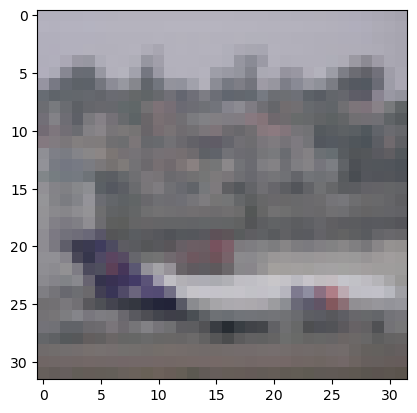

In [7]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


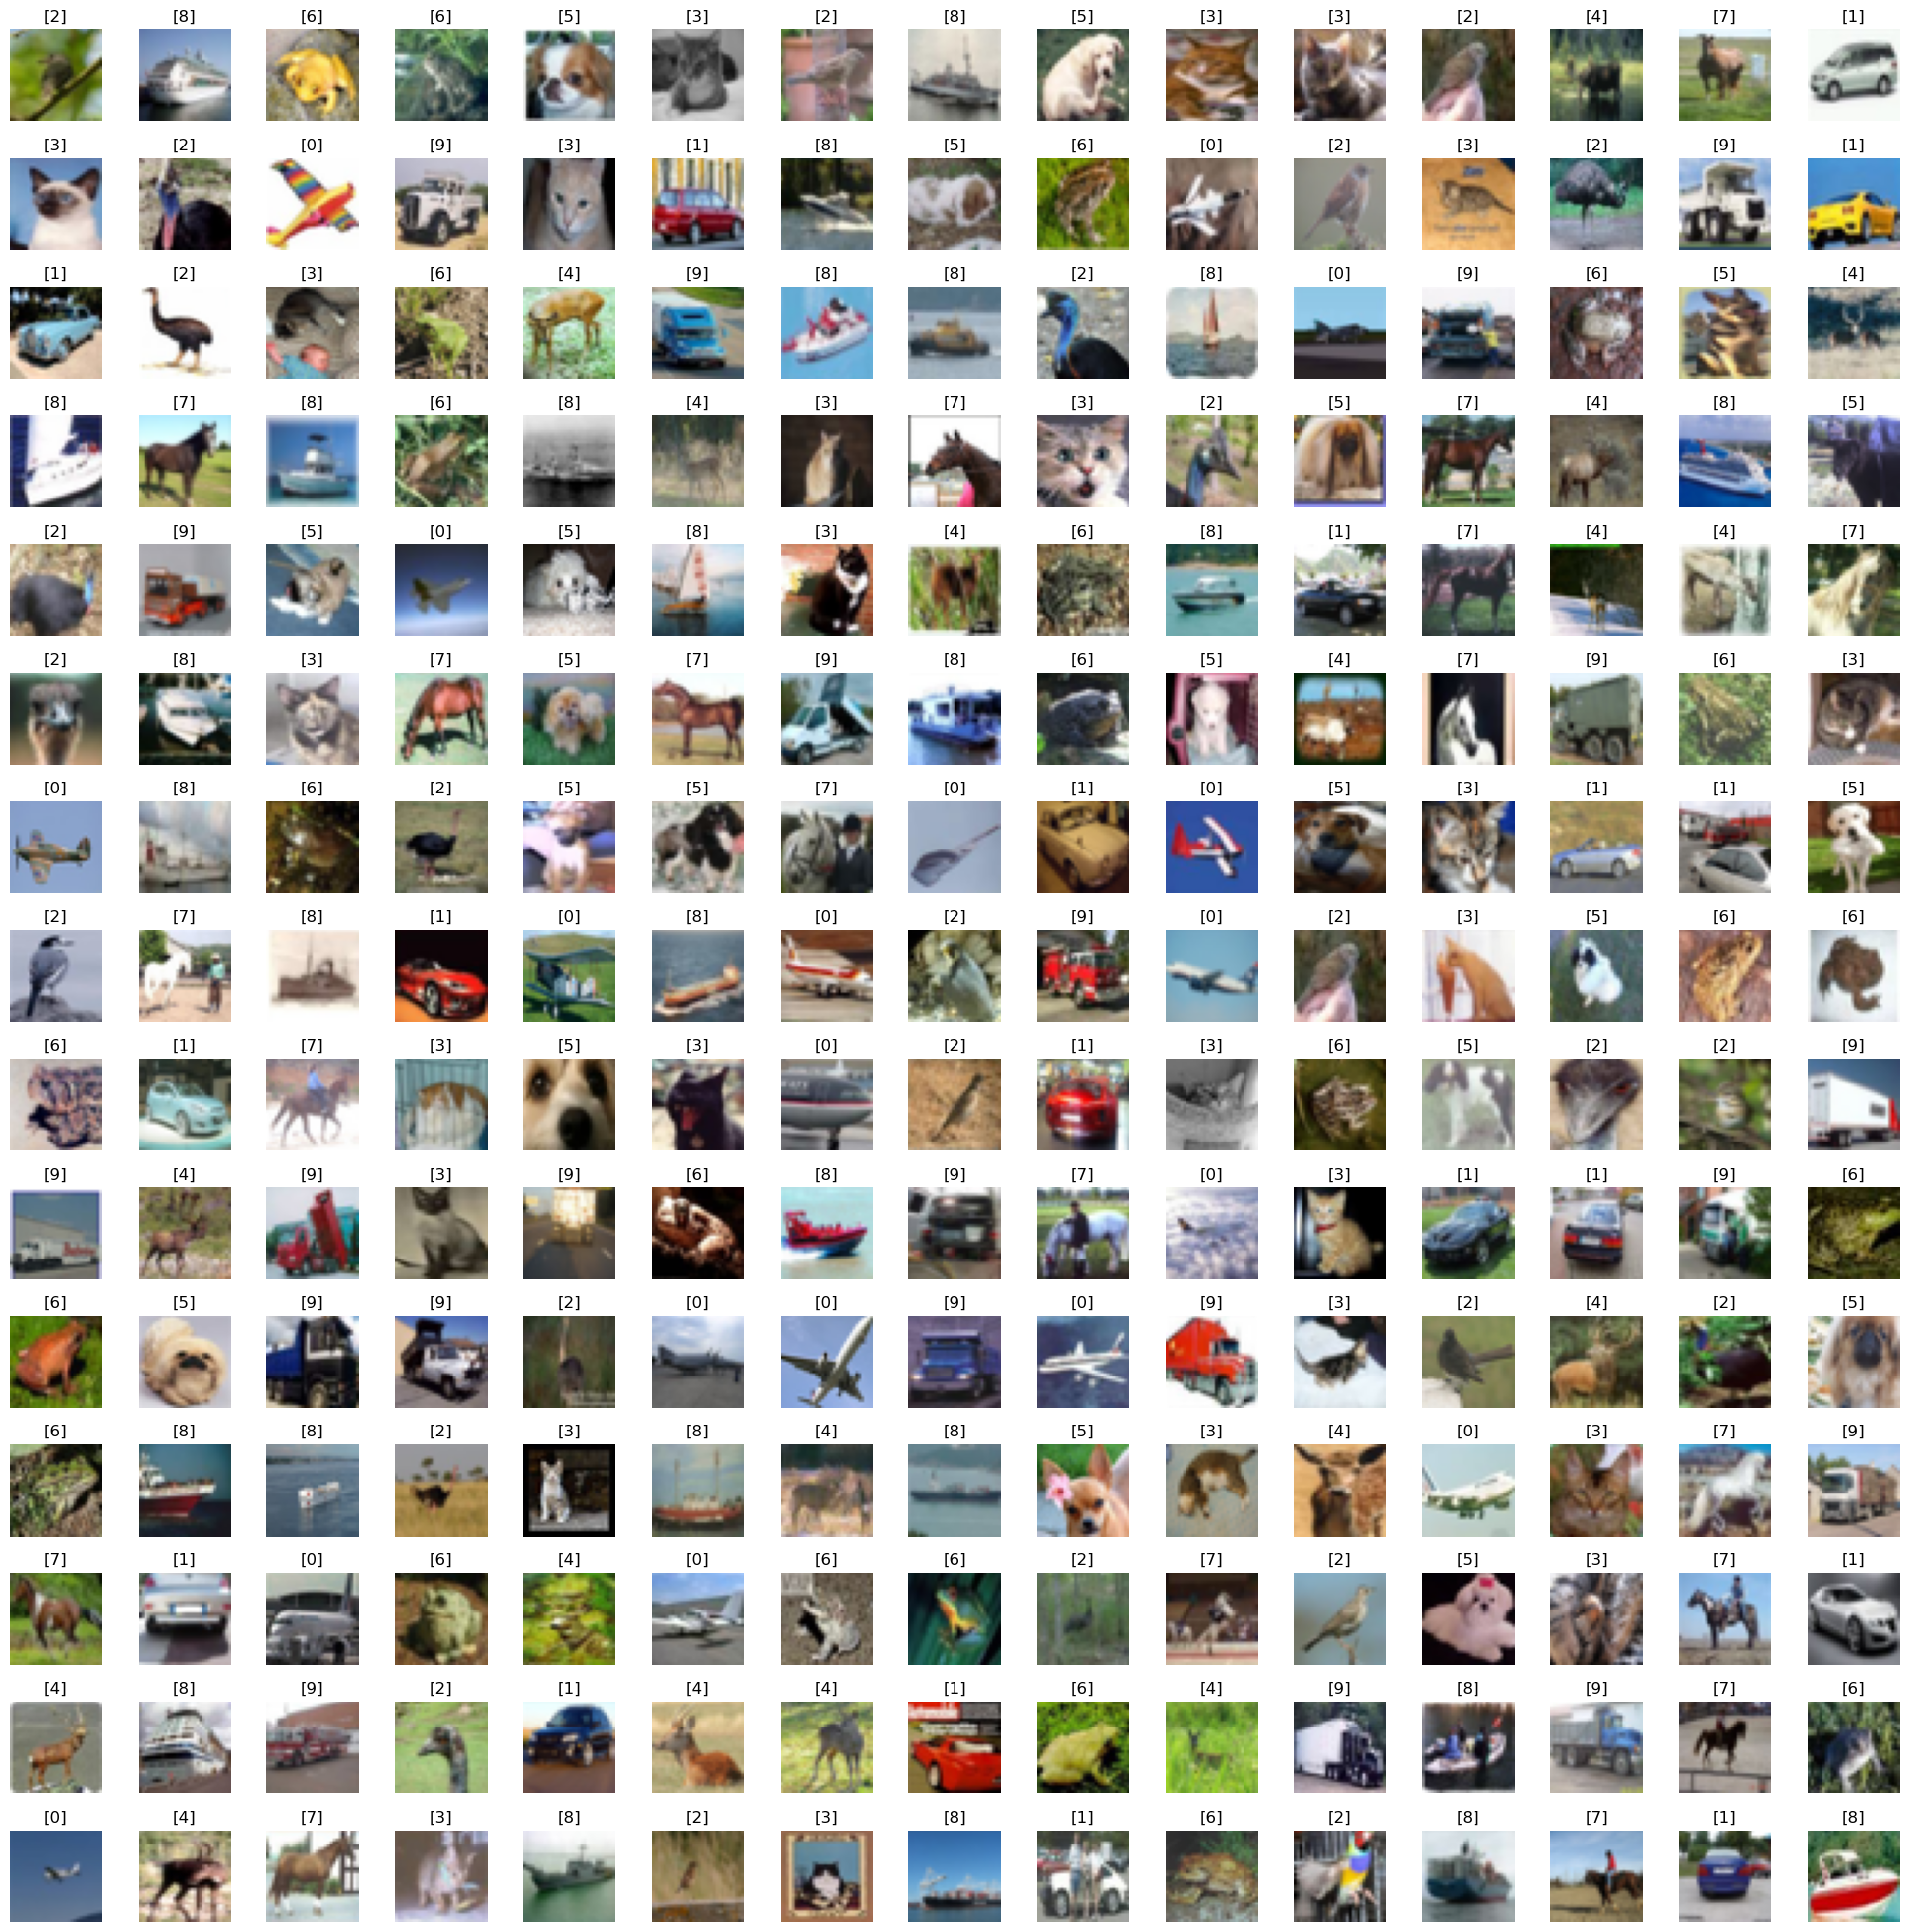

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid,figsize = (25,25))
axes = axes.ravel() #flatten the matrix basically 15x15=225

n_training = len(X_train)

for i in np.arange(0,L_grid *W_grid):
    index = np.random.randint(0,n_training) #pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
    plt.subplots_adjust(hspace=0.4) #provide more space between the pictures

In [9]:
n_training

50000

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') #converting our data into float format

In [11]:
number_cat = 10


In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat) #converting numbers to binary

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train = X_train/255 #normalize to have it between the range of 0 to 1
X_test = X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape #size of the actual input image


(32, 32, 3)

In [22]:
from keras.models import Sequential #keras is a API that sits on top of tensorflow
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
#Building the model and model training
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2)) #compression
cnn_model.add(Dropout(0.3)) #cnn (2layers of convolution)(32),dropping out 30% of neurons

cnn_model.add(Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))#cnn (2layers of convolution)(64),dropping out 20% of neurons

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512,activation ='relu'))

cnn_model.add(Dense(units = 512,activation ='relu'))#fully connected neural network so we use dense

cnn_model.add(Dense(units = 10 , activation = 'softmax'))
#output layer , 10 classification class and we dont use relu becuase relu is
#relu is more likely to be used for regression,for classification we use softmax that gives us
#outputs in 0 and 1

In [24]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])


In [25]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=2, shuffle=True)


Epoch 1/2
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5867 - accuracy: 0.4236
Epoch 2/2
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1658 - accuracy: 0.5890


In [26]:
#Evaluate the model
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 10s 30ms/step - loss: 1.3214 - accuracy: 0.5567
Test Accuracy: 0.5566999912261963


In [27]:
#using the predict method to get my predicted classes
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
predicted_classes


313/313 [==============================] - 7s 22ms/step


array([3, 8, 3, ..., 5, 2, 7], dtype=int64)

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test = y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

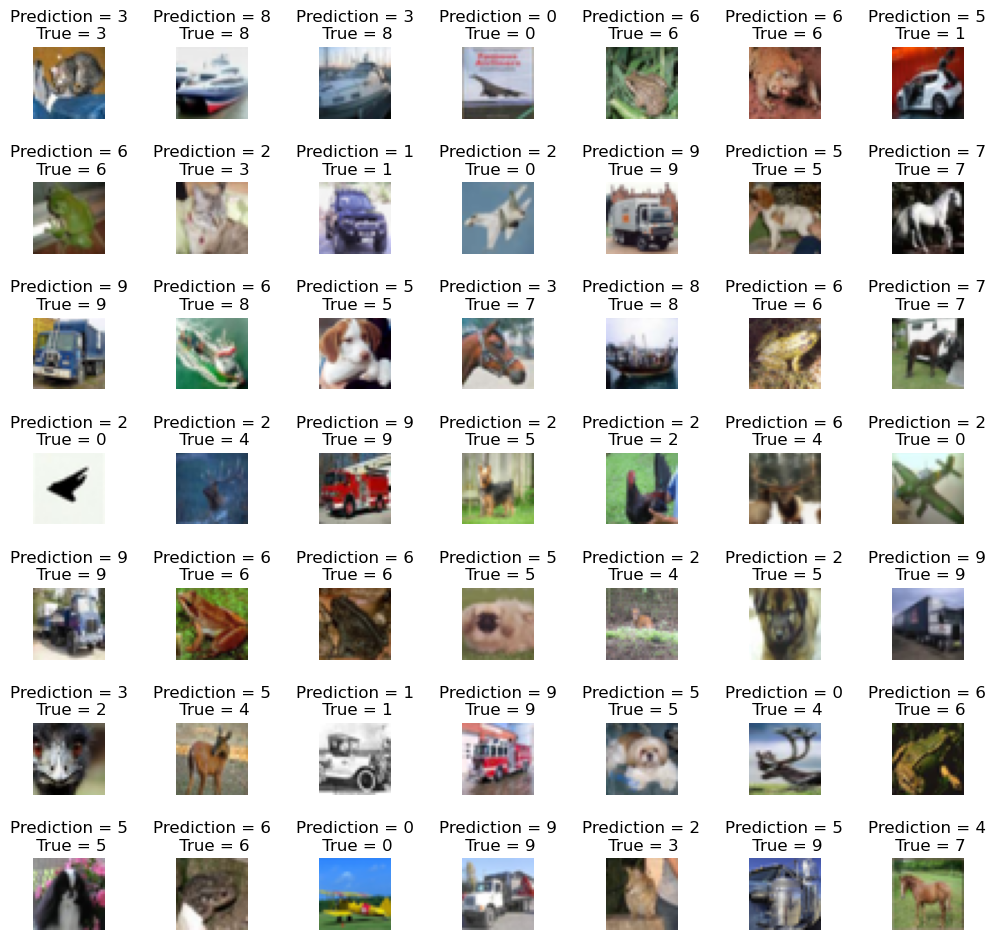

In [31]:
#able to visualize the images with their predictions and true labels
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

<Axes: >

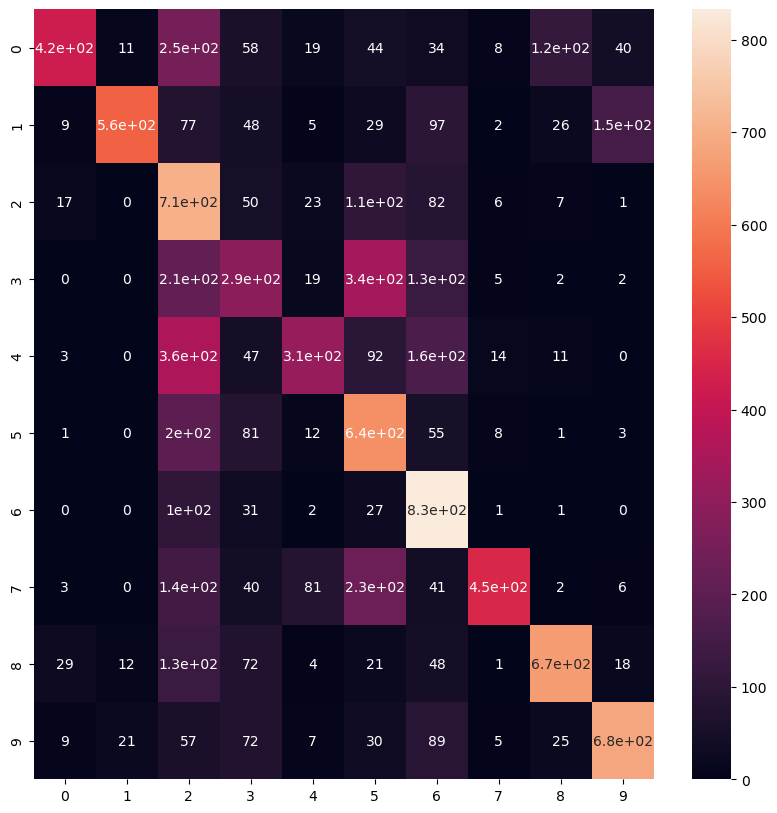

In [32]:
#evaluationg the model using confusion matrix and heatmap which tells us how the model is performing
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True)

In [33]:
#saving the model basically saving the cnn_model because all the intelligence is captured in that
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

C:\Users\samee\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
#data augmentation for cifar10 dataset
import keras
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
X_train.shape

(50000, 32, 32, 3)

In [37]:
n = 8
x_train_sample = X_train[:n]

In [38]:
x_train_sample.shape

(8, 32, 32, 3)

In [39]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train = ImageDataGenerator(vertical_flip=True)
dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))
dataget_train.fit(X_train)

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(rotation_range=90)

# Assuming X_train_sample is your sample of training images
n = len(X_train)

# Plot the augmented images
fig = plt.figure(figsize=(20, 2))
for x_batch in datagen.flow(X_train, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(x_batch[i].astype('uint8'))
        ax.axis('off')
    fig.suptitle('Augmented images (rotated 90 degrees)', fontsize=16)
    plt.show()
    break


In [ ]:
datagen = ImageDataGenerator(
rotation_range = 90,
width_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
)

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train , y_train , batch_size = 32),epochs = 2)

In [ ]:
score = cnn_model.evaluate(X_test,y_test)
print('Test accuracy',score[1])

In [ ]:
#saving the model basically saving the cnn_model because all the intelligence is captured in that
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)